# English Wikipedia page views, 2008 - 2017

For this assignment, goal is to analyze traffic on English Wikipedia over time, and then document your process and the resulting dataset and visualization according to best practices for open research that were outlined for you in class.

### Example API request
You can use this example API request as a starting point for building your API queries. Note that the [Legacy Pagecounts API](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts) has slightly different schema than the [pageview API](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews) shown here.

This sample API request would get you all pageviews by web crawlers on the mobile website for English Wikipedia during the month of September, 2017.

## Step 1: Data acquisition

#### Collect dataset of monthly traffic on English Wikipedia from July 1 2008 through September 30 2017.

Using Legacy Pagcounts API - From January 2008 through July 2016. 
    * By Desktop
        -- pagecounts_desktop-site_200801-201607.json
    * By Mobile 
        -- pagecounts_mobile-site_200801-201607.json
        
Variable  :
        -- pcStart = 2008010100
        -- pcEnd = 2016080100
       

In [254]:
# Required Library 
import requests
import json

In [255]:
# API  :  https://wikimedia.org/api/rest_v1/#/Legacy_data 
# Understanding of Legacy API  - Modifying endpoint and Parameter accordingly 
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
headers={'User-Agent' : 'https://github.com/abhishekanand', 'From' : 'anand1@uw.edu'}

In [256]:
# Getting PageCount [Legacy API (User+Spider)]  : Desktop-site 
OUTPUT_File = 'pagecounts_desktop-site_200801-201607.json'
params = {'project' : 'en.wikipedia.org',
            'access-site' : 'desktop-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016080100'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
#print(endpoint.format(**params))
pagecount_desktop_views = api_call.json()
#print(pagecount_desktop_views) # Print Resposne from API call 

# https://stackoverflow.com/questions/17043860/python-dump-dict-to-json-file
with open(OUTPUT_File, 'w') as fp:
    json.dump(pagecount_desktop_views, fp)
    

In [257]:
# Getting PageCount [Legacy API (User+Spider)]   : Mobile-site
OUTPUT_File = 'pagecounts_mobile-site_200801-201607.json'
params = {'project' : 'en.wikipedia.org',
            'access-site' : 'mobile-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016080100'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
#print(endpoint.format(**params))
pagecount_mobile_views = api_call.json()
#print(pagecount_mobile_views) # Print Resposne from API call 

# https://stackoverflow.com/questions/17043860/python-dump-dict-to-json-file
with open(OUTPUT_File, 'w') as fp:
    json.dump(pagecount_mobile_views, fp)
    

Using Pageviews API - From July 2015 through September 2017.
* By Desktop
    -- pageviews_desktop-site_201501-201709.json       
* By Mobile web
    -- pageviews_mobileweb-site_201501-201709.json
* By Mobile App
    -- pageviews_mobileapp-site_201501-201709.json
Variable : -- pvstart = 2015070100 -- pvEnd = 2017100100

In [258]:

endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'
headers={'User-Agent' : 'https://github.com/abhishekanand', 'From' : 'anand1@uw.edu'}

# Using Pageviews API - From July 2015 through September 2017
#pvStart = 2015070100
#pvEnd = 2017091000 


In [259]:
# Getting PageView [(User)] : Desktop
OUTPUT_File = 'pageviews_desktop-site_201501-201709.json'
params = {'project' : 'en.wikipedia.org',
            'access' : 'desktop',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017100100'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
pageview_desktop_views = api_call.json()
# print(pageview_desktop_views) # Print Resposne from API call 

# https://stackoverflow.com/questions/17043860/python-dump-dict-to-json-file
with open(OUTPUT_File, 'w') as fp:
    json.dump(pageview_desktop_views, fp)
    

In [260]:
# Getting PageView [(User)]  : mobile-app
OUTPUT_File = 'pageviews_mobileapp-site_201501-201709.json'
params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-app',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017100100'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
pageview_mobile_app_views = api_call.json()
# print(pageview_mobile_app_views) # Print Resposne from API call 

# https://stackoverflow.com/questions/17043860/python-dump-dict-to-json-file
with open(OUTPUT_File, 'w') as fp:
    json.dump(pageview_mobile_app_views, fp)

In [261]:
# Getting PageView [(User)]  : mobile-web
OUTPUT_File = 'pageviews_mobileweb-site_201501-201709.json'
params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-web',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017100100'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
pageview_mobile_web_views = api_call.json()
# print(pageview_mobile_web_views) # Print Resposne from API call 

# https://stackoverflow.com/questions/17043860/python-dump-dict-to-json-file
with open(OUTPUT_File, 'w') as fp:
    json.dump(pageview_mobile_web_views, fp)

## Step 2: Data processing

In [262]:
#From Jan 1 2008 to Sep 2017,
# output dictionary will have 12*9+9=117

# creating output dictionary with year, month and all other data set as 0


startYear = 2008
startMonth = 1
endYear = 2017
endMonth = 9

totalMonths = (endYear-1-startYear+1)*12 + endMonth
print(totalMonths)

output = []

for year in range(startYear, endYear+1):
        for month in range(startMonth, 13):
            temp ={}
            temp["year"] = str(year)
            # https://stackoverflow.com/questions/339007/nicest-way-to-pad-zeroes-to-string
            temp["month"] = str(month).rjust(2, '0')
            temp["pagecount_all_views"] = 0
            temp["pagecount_desktop_views"] = 0
            temp["pagecount_mobile_views"] = 0
            temp["pageview_all_views"] = 0
            temp["pageview_desktop_views"] = 0
            temp["pageview_mobile_views"] = 0
            output.append(temp)
#print(output)



117


For data collected from the Pageviews API, combine the monthly values for mobile-app and mobile-web to create a total mobile traffic count for each month.

In [263]:
# Code 
# pagecount_desktop_views
count_pagecount_desktop_views = 0 
for item in pagecount_desktop_views["items"]:
    timestamp = item["timestamp"]
    
    # parsing timestamp to get year and month
    year = timestamp[0:4] 
    month = timestamp[4:6]
    
    views = item["count"]
    
    
    for element in output:
        if(element["year"]==year and element["month"]==month):
            count_pagecount_desktop_views= count_pagecount_desktop_views+1
            element["pagecount_desktop_views"] = views
            
print(output)
print(count_pagecount_desktop_views)

[{'year': '2008', 'month': '01', 'pagecount_all_views': 0, 'pagecount_desktop_views': 4930902570, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '02', 'pagecount_all_views': 0, 'pagecount_desktop_views': 4818393763, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '03', 'pagecount_all_views': 0, 'pagecount_desktop_views': 4955405809, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '04', 'pagecount_all_views': 0, 'pagecount_desktop_views': 5159162183, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '05', 'pagecount_all_views': 0, 'pagecount_desktop_views': 5584691092, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_de

In [264]:
# Code 
# pagecount_mobile_views
count_pagecount_mobile_views = 0 
for item in pagecount_mobile_views["items"]:
    timestamp = item["timestamp"]
    
    # parsing timestamp to get year and month
    year = timestamp[0:4] 
    month = timestamp[4:6]
    
    views = item["count"]
    
    
    for element in output:
        if(element["year"]==year and element["month"]==month):
            count_pagecount_mobile_views= count_pagecount_mobile_views+1
            element["pagecount_mobile_views"] = views
            
print(output)
print(count_pagecount_mobile_views)


[{'year': '2008', 'month': '01', 'pagecount_all_views': 0, 'pagecount_desktop_views': 4930902570, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '02', 'pagecount_all_views': 0, 'pagecount_desktop_views': 4818393763, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '03', 'pagecount_all_views': 0, 'pagecount_desktop_views': 4955405809, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '04', 'pagecount_all_views': 0, 'pagecount_desktop_views': 5159162183, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '05', 'pagecount_all_views': 0, 'pagecount_desktop_views': 5584691092, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_de

In [265]:
# Code 
#print(pageview_desktop_views["items"])
#print(len(pageview_desktop_views["items"]))

count_pageview_desktop_views = 0 
for item in pageview_desktop_views["items"]:
    timestamp = item["timestamp"]
    
    # parsing timestamp to get year and month
    year = timestamp[0:4] 
    month = timestamp[4:6]
    
    views = item["views"]
    
    
    for element in output:
        if(element["year"]==year and element["month"]==month):
            count_pageview_desktop_views= count_pageview_desktop_views+1
            element["pageview_desktop_views"] = views
            
print(output)
print(count_pageview_desktop_views)

[{'year': '2008', 'month': '01', 'pagecount_all_views': 0, 'pagecount_desktop_views': 4930902570, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '02', 'pagecount_all_views': 0, 'pagecount_desktop_views': 4818393763, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '03', 'pagecount_all_views': 0, 'pagecount_desktop_views': 4955405809, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '04', 'pagecount_all_views': 0, 'pagecount_desktop_views': 5159162183, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '05', 'pagecount_all_views': 0, 'pagecount_desktop_views': 5584691092, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_de

For all data, separate the value of timestamp into four-digit year (YYYY) and two-digit month (MM) and discard values for day and hour (DDHH).
Combine all data into a single CSV file with the following headers:

Column            	         Value
year	                     YYYY
month	                     MM
pagecount_all_views	         num_views
pagecount_desktop_views	     num_views
pagecount_mobile_views	     num_views
pageview_all_views	         num_views
pageview_desktop_views	     num_views
pageview_mobile_views	     num_views


In [266]:
# Code 


count_pageview_mobile_app_views = 0 
for item in pageview_mobile_app_views["items"]:
    timestamp = item["timestamp"]
    
    # parsing timestamp to get year and month
    year = timestamp[0:4] 
    month = timestamp[4:6]
    
    views = item["views"]
    
    
    for element in output:
        if(element["year"]==year and element["month"]==month):
            count_pageview_mobile_app_views= count_pageview_mobile_app_views+1
            element["pageview_mobile_views"] = views
            
print(output)
print(count_pageview_mobile_app_views)

[{'year': '2008', 'month': '01', 'pagecount_all_views': 0, 'pagecount_desktop_views': 4930902570, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '02', 'pagecount_all_views': 0, 'pagecount_desktop_views': 4818393763, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '03', 'pagecount_all_views': 0, 'pagecount_desktop_views': 4955405809, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '04', 'pagecount_all_views': 0, 'pagecount_desktop_views': 5159162183, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '05', 'pagecount_all_views': 0, 'pagecount_desktop_views': 5584691092, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_de

In [267]:

count_pageview_mobile_web_views = 0 
for item in pageview_mobile_web_views["items"]:
    timestamp = item["timestamp"]
    
    # parsing timestamp to get year and month
    year = timestamp[0:4] 
    month = timestamp[4:6]
    
    views = item["views"]
    
    
    for element in output:
        if(element["year"]==year and element["month"]==month):
            count_pageview_mobile_web_views= count_pageview_mobile_web_views+1
            element["pageview_mobile_views"] =  element["pageview_mobile_views"] + views
            
print(output)
print(count_pageview_mobile_web_views)

[{'year': '2008', 'month': '01', 'pagecount_all_views': 0, 'pagecount_desktop_views': 4930902570, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '02', 'pagecount_all_views': 0, 'pagecount_desktop_views': 4818393763, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '03', 'pagecount_all_views': 0, 'pagecount_desktop_views': 4955405809, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '04', 'pagecount_all_views': 0, 'pagecount_desktop_views': 5159162183, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '05', 'pagecount_all_views': 0, 'pagecount_desktop_views': 5584691092, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_de

In [268]:
# pagecount_all_views = pagecount_mobile_views + pagecount_desktop_views
# pageview_all_views = pageview_mobile_views + pageview_desktop_views
for item in output:
    item["pagecount_all_views"] = item["pagecount_mobile_views"] + item["pagecount_desktop_views"]
    item["pageview_all_views"] = item["pageview_mobile_views"] + item["pageview_desktop_views"]

print(output)

[{'year': '2008', 'month': '01', 'pagecount_all_views': 4930902570, 'pagecount_desktop_views': 4930902570, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '02', 'pagecount_all_views': 4818393763, 'pagecount_desktop_views': 4818393763, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '03', 'pagecount_all_views': 4955405809, 'pagecount_desktop_views': 4955405809, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '04', 'pagecount_all_views': 5159162183, 'pagecount_desktop_views': 5159162183, 'pagecount_mobile_views': 0, 'pageview_all_views': 0, 'pageview_desktop_views': 0, 'pageview_mobile_views': 0}, {'year': '2008', 'month': '05', 'pagecount_all_views': 5584691092, 'pagecount_desktop_views': 5584691092, 'pagecount_mobile_vie

In [269]:
# The final data file should be named: en-wikipedia_traffic_200801-201709.csv
import csv
CSVOut = "en-wikipedia_traffic_200801-201709.csv"
with open(CSVOut, "w") as ofile:
    ofile.write("year" + "," + "month" + "," + "pagecount_all_views"+"," + "pagecount_desktop_views"+"," + "pagecount_mobile_views"+"," + "pageview_all_views"+"," + "pageview_desktop_views"+"," + "pageview_mobile_views"+ "\n")
    for item in output:
        ofile.write(str(item["year"]) + "," + str(item["month"]) + "," + str(item["pagecount_all_views"])+"," + str(item["pagecount_desktop_views"])+"," + str(item["pagecount_mobile_views"]) +"," + str(item["pageview_all_views"]) +"," + str(item["pageview_desktop_views"]) +"," + str(item["pageview_mobile_views"]) + "\n")
print("Done")            

Done


In [270]:
#https://chrisalbon.com/python/pandas_dataframe_importing_csv.html

df = pd.DataFrame(output, columns=['year','month','pagecount_all_views','pagecount_desktop_views','pagecount_mobile_views','pageview_all_views','pageview_desktop_views','pageview_mobile_views'])
#print(df)


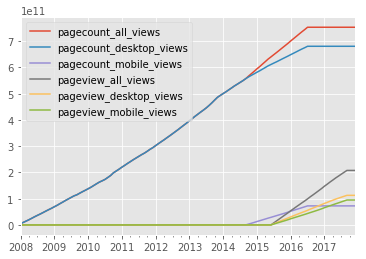

In [273]:
# Pandas Documnetation 
# https://pandas.pydata.org/pandas-docs/stable/visualization.html 
# Convert Select Columns in Pandas Dataframe to Numpy Array
# https://stackoverflow.com/questions/31789160/convert-select-columns-in-pandas-dataframe-to-numpy-array
# df.as_matrix(columns=df.columns[2:])

import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('ggplot')
%matplotlib inline

#dfg = pd.DataFrame(df.as_matrix(columns=df.columns[2:]), index=pd.date_range('1/1/2008', periods=120), columns=['pagecount_all_views','pagecount_desktop_views','pagecount_mobile_views','pageview_all_views','pageview_desktop_views','pageview_mobile_views'])
dfg = pd.DataFrame(df.as_matrix(columns=df.columns[2:]), index=pd.date_range(start='1/1/2008', end='12/1/2017', freq='MS'), columns=['pagecount_all_views','pagecount_desktop_views','pagecount_mobile_views','pageview_all_views','pageview_desktop_views','pageview_mobile_views'])
dfg = dfg.cumsum()

plt.figure(); 
dfg.plot();

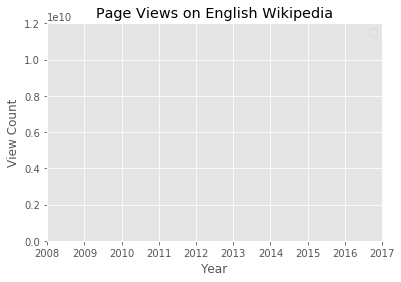

In [272]:
# 
plt.ylim(0, 12000000000)
plt.xlim(2008,2017)
plt.xlabel('Year')
plt.ylabel('View Count')
plt.title('Page Views on English Wikipedia')
plt.legend(['main site', 'mobile site', 'total'])
plt.show()